# Regression 1
## Iain Styles
## Machine Learning and Intelligent Data Analysis 2021/22

# Figure 1
An example of a dataset with independent variable $x$ and dependent
variable $t$. The values of $t$ are generated as $t=\sin(\pi x)$ with
added Gaussian noise. The datapoints are shown as blue dots, with the
curve $t=\sin(\pi x)$ shown as a black line to guide the
eye.

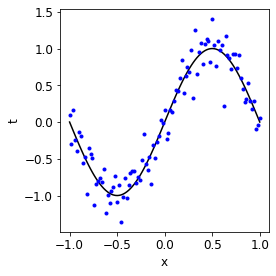

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4, 4] # inches
mpl.rcParams['font.size'] = 12
# We set the random seed manually so that the results can be reproduced
np.random.seed(1234)
# define the data generating function
h = lambda x: np.sin(np.pi*x)
xmin = -1
xmax = 1
# Define a single independent variable
N = 101
x = np.linspace(xmin, xmax, num=N)
# Define the data with added noise
t = h(x) + 0.2*(np.random.randn(N))
# Add random Gaussian noise with unit variance
plt.figure()
plt.plot(x,h(x),'k-',x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('simple-sine.png')

## Figure 2
The residuals (shown in {\color{red}red}) are a measure of the goodness-of-fit of a function (black line) to a set of data ({\color{blue} blue points}).

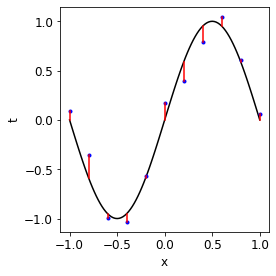

In [2]:
import matplotlib.pyplot as plt
# Select every tenth point from the dataset
xtrain = x[0::10]
ttrain = t[0::10]
plt.figure()
plt.plot(x,h(x),'k-')
plt.plot(xtrain,ttrain,'b.')
for i,j in enumerate(xtrain):
        plt.plot([j,j],[ttrain[i],h(j)],'r-')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('residuals.png')

## Figure 3
Convergence of the polynomial approximation of $\sin{\pi x}$.

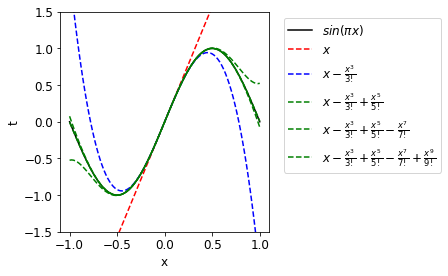

In [3]:
plt.figure()
plt.plot(x,h(x),'k-')
xx = np.pi*x
approx = xx
plt.plot(x,approx,'r--')
approx = approx - (pow(xx,3))/np.math.factorial(3)
plt.plot(x,approx,'b--')
approx = approx + (pow(xx,5))/np.math.factorial(5)
plt.plot(x,approx,'g--')
approx = approx - (pow(xx,7))/np.math.factorial(7)
plt.plot(x,approx,'g--')
approx = approx + (pow(xx,9))/np.math.factorial(9)
plt.plot(x,approx,'g--')
plt.xlabel('x')
plt.ylabel('t')
plt.ylim(-1.5,1.5)
plt.tight_layout()
lgd = plt.legend([r'$sin(\pi x)$',r'$x$',r'$x-\frac{x^3}{3!}$', r'$x-\frac{x^3}{3!}+\frac{x^5}{5!}$',r'$x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}$',r'$x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\frac{x^9}{9!}$'],bbox_to_anchor=[1.04,1])
plt.savefig('taylor.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

## Figure 4
Polynomial fitting of $t=\sin(\pi x)+\epsilon$ using polynomial fits of increasing order. The data points ($N=101$) are shown in blue; the data generating function is shown in black; the best fit resulting from minimising the mean squared error is shown in red.

0 &  0.01
1 &  0.01 &  0.92
2 &  0.01 &  0.92 & -0.02
3 &  0.01 &  2.68 & -0.02 & -2.87
4 &  0.00 &  2.68 &  0.08 & -2.87 & -0.12
5 &  0.00 &  3.01 &  0.08 & -4.40 & -0.12 &  1.35
6 & -0.01 &  3.01 &  0.35 & -4.40 & -0.91 &  1.35 &  0.57
7 & -0.01 &  3.02 &  0.35 & -4.43 & -0.91 &  1.42 &  0.57 & -0.04
8 & -0.02 &  3.02 &  0.88 & -4.43 & -3.77 &  1.42 &  5.44 & -0.04 & -2.56
9 & -0.02 &  3.12 &  0.88 & -5.95 & -3.77 &  7.23 &  5.44 & -8.20 & -2.56 &  3.78
10 & -0.05 &  3.12 &  2.26 & -5.95 & -15.55 &  7.23 & 40.19 & -8.20 & -44.06 &  3.78 & 17.23


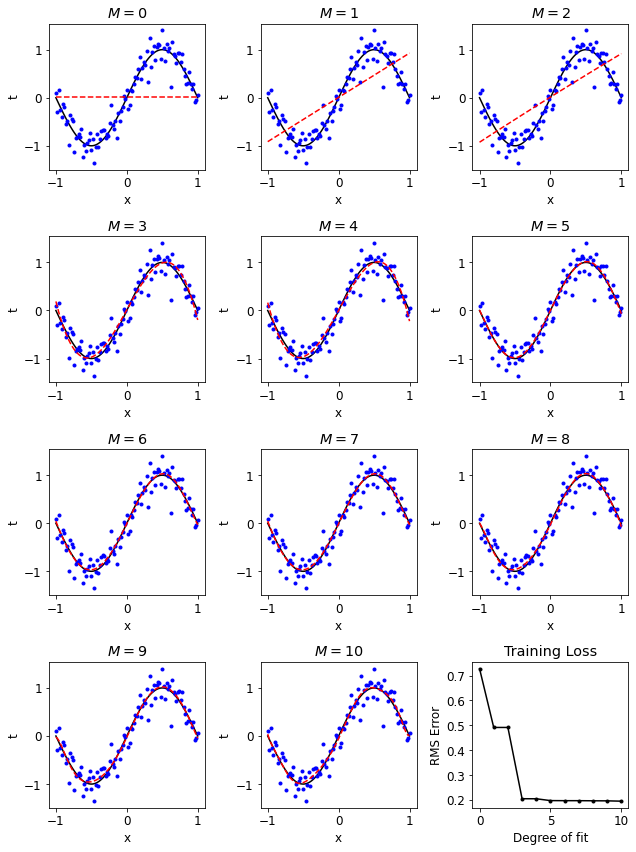

In [4]:
# Maximum degree of fit
M = 11
# Empty list to record the RMS errors
rsq = []
# Empty list to record the weights for each regression run
weights = []
plt.figure(figsize=[9,12])
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),t))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(t-yp,2)/x.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    plt.subplot(4,3,i+1)
    plt.plot(x,h(x),'k-')
    plt.plot(x,t,'b.')
    plt.plot(x,np.matmul(Phi,w),'r--')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(fr'$M={i}$')
# Plot the error curve
plt.subplot(4,3,M+1)
plt.plot(rsq,'k.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.title('Training Loss')
plt.tight_layout()
plt.savefig('polyfit-sin-101.png')
# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:5.2f}'.format(i) for i in w]))    

## Figure 5
Polynomial fitting of $t=\sin(\pi x)+\epsilon$ using polynomial fits of increasing order. The data points ($N=11$) are shown in blue; the data generating function is shown in black; the best fit resulting from minimising the mean squared error is shown in red. The characteristic signs of ``overfitting'' are visible in the higher order fits.

0 &  0.02
1 &  0.02 &  0.65
2 & -0.04 &  0.65 &  0.15
3 & -0.04 &  2.51 &  0.15 & -2.60
4 & -0.05 &  2.51 &  0.21 & -2.60 & -0.06
5 & -0.05 &  3.00 &  0.21 & -4.66 & -0.06 &  1.63
6 &  0.03 &  3.00 & -1.26 & -4.66 &  4.00 &  1.63 & -2.69
7 &  0.03 &  2.40 & -1.26 &  0.64 &  4.00 & -9.52 & -2.69 &  6.47
8 &  0.10 &  2.40 & -3.94 &  0.64 & 19.22 & -9.52 & -29.24 &  6.47 & 13.94
9 &  0.10 &  2.41 & -3.94 &  0.47 & 19.22 & -8.80 & -29.24 &  5.37 & 13.94 &  0.54
10 &  0.17 &  2.41 & -9.18 &  0.47 & 77.45 & -8.80 & -241.80 &  5.37 & 312.46 &  0.54 & -139.02


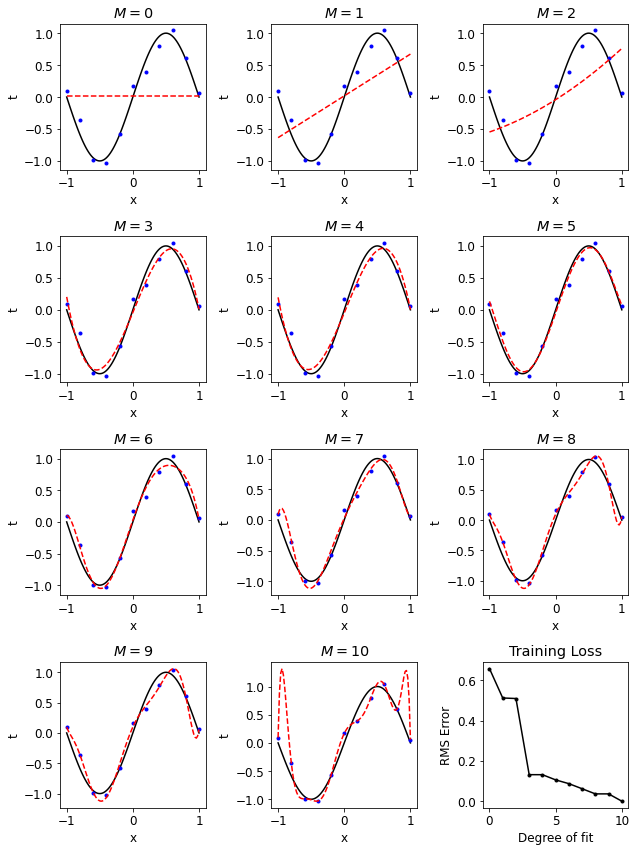

In [5]:
# Maximum degree of fit
M = 11
# Empty list to record the RMS errors
rsq = []
# Empty list to record the weights for each regression run
weights = []
plt.figure(figsize=[9,12])
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    Phi = np.array([pow(xtrain,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial smoothly
    hiPhi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),ttrain))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    yp = np.matmul(Phi,w)
    # compute the RMS error
    rsq.append(np.sqrt(np.sum(pow(ttrain-yp,2)/xtrain.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    plt.subplot(4,3,i+1)
    plt.plot(x,h(x),'k-')
    plt.plot(xtrain,ttrain,'b.')
    plt.plot(x,np.matmul(hiPhi,w),'r--')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(fr'$M={i}$')
# Plot the error curve
plt.subplot(4,3,M+1)
plt.plot(rsq,'k.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.title('Training Loss')
plt.tight_layout()
plt.savefig('polyfit-sin-11.png')
# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:5.2f}'.format(i) for i in w]))    